In [295]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,974 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [333]:
from PIL import Image
from operator import itemgetter
from collections import Counter
import numpy as np

import pytesseract
import shutil
import os
import random

In [323]:
import cv2

In [358]:
from google.colab.patches import cv2_imshow

In [606]:
import re
import collections
import json
import pandas as pd

In [641]:
im = Image.open("cropp_0.png")
im = im.convert("P")

In [647]:
def HistCanal(imx):
  grid = {}
  for z in range(2,70):
    im2 = Image.new("P",imx.size,255)
    for x in range(imx.size[1]):
      for y in range(imx.size[0]):
        pix = im.getpixel((y,x))
        if pix == z: im2.putpixel((y,x),0)
    #grid[z] = len([px for px in list(im.getdata()) if px[1] < 0.01]) #im2[np.where(im2==0)].sum() #np.count_nonzero(im2) #np.sum(im2 != 255) #/ (im.size[0] * im.size[1])
    newim = cv2.cvtColor(np.asarray(im2),cv2.COLOR_RGB2BGR)
    #newim = cv2.cvtColor(np.array(im2), cv2.COLOR_BGR2GRAY) # COLOR_RGB2BGR
    grid[z] = np.sum(newim != 255)
    #cv2_imshow(newim)
    #if z == 8:
      #im2
      #cv2_imshow(newim)
      #break
    #break
  return grid

In [673]:
im = Image.open("captcha_01.png")
im = im.convert("P")
cropped_image = im.crop((0, 0, 25, 45))
cropped_image.save("cropp_0.png")
cropped_image

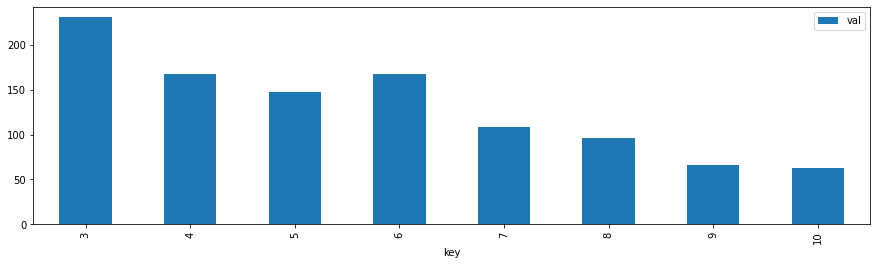

In [674]:
a = HistCanal(cropped_image)
df = pd.DataFrame(list(a.items()),columns = ['key','val'])
df.query('val>0').groupby(['key']).agg({'val':'sum'}).plot.bar(figsize=[15,4])

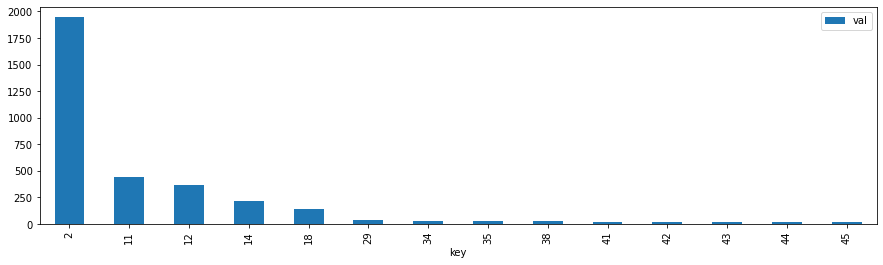

In [681]:
a = HistCanal(im)
df = pd.DataFrame(list(a.items()),columns = ['key','val'])
df.query('val>0 & key == [2,11,12,14,18, 29, 34, 35, 38, 41, 42, 43, 44, 45]').groupby(['key']).agg({'val':'sum'}).plot.bar(figsize=[15,4])

## Teste 1

In [ ]:
for x in range(im.size[1]):
  for y in range(im.size[0]):
    pix = im.getpixel((y,x))
    temp[pix] = pix
    if pix in [2,11,12,14,18, 29, 34, 35, 38, 41, 42, 43, 44, 45]: #
    #if pix in [2,11,12,14,18, 29, 34, 35, 38, 41, 42, 47, 49, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70]: #   
      im2.putpixel((y,x),0)

im2
#im2.save("output.png")

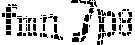

In [335]:
cropped_image = imo.crop((25, 0, 160, 45))
cropped_image.save("cropp.png")
cropped_image

### Teste 2 (ok!)

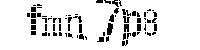

In [753]:
img = cv2.imread('captcha_01.png')
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(im_bw)

"n"  %W:0.31851851851851853  xPos:66 Width:20 Heigth:27 


"8"  %W:0.32873563218390806  xPos:143 Width:15 Heigth:29 


"p"  %W:0.37995337995337997  xPos:120 Width:22 Heigth:39 


"f"  %W:0.33613445378151263  xPos:25 Width:17 Heigth:35 


"m"  %W:0.22993197278911565  xPos:25 Width:21 Heigth:35 


"7"  %W:0.43280632411067194  xPos:97 Width:23 Heigth:44 Erosion


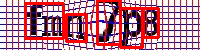

fmn7p8


In [754]:
img_tmp = im_bw.copy()
blured = cv2.blur(im_bw, (5,5), 0)    
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours, Hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) #imgContours, 
result={}
for contour in Contours:
  if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
    [X, Y, W, H] = cv2.boundingRect(contour)
    #cropped_image_00 = cropped_image.crop((0, 0, 17, 45))
    crp_img = img_tmp[Y:Y+H, X:X+W]
    #cv2.imshow("cropped", crop_img)
    if W > 35:
      xW = 17
      if X > 65: xW = 30
      crp_img01 = crp_img[0:H, 0:xW]
      result[X] = GetLetter(crp_img01,X)
      crp_img02 = crp_img[0:H, xW:W]
      result[(X+1)] = GetLetter(crp_img02,X)
      #cv2_imshow(crp_img01)
    else:
      result[X] = GetLetter(crp_img,X)
      #cv2.imwrite('contour_0'+str(X).zfill(3)+'.png',crp_img)
    cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)
    result2 = ''.join(dict(sorted(result.items())).values())

cv2_imshow(img)
print(result2)

In [741]:
def GetLetter(imgXX,xPos):
  h,w = imgXX.shape
  gray = imgXX #cv2.cvtColor(imgXX, cv2.COLOR_BGR2GRAY)
  thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
  kernel = np.ones((2,2),np.uint8)
  closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
  ero = ""
  if h>40:
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.dilate(closing,kernel,iterations = 1)
    closing = erosion
    ero = "Erosion"
  
  cv2_imshow(closing)
  text = pytesseract.image_to_string(
     closing, config=("-c tessedit"
                  "_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
                  " --psm 10"
                  " -l osd"
                  " "))
  text = re.findall(r'[a-zA-Z0-9]', text)[0]
  pc_white = np.sum(closing == 255) / (h*w)
  #print(pc_white)
  if text=='r' and pc_white > 0.33: text = 'f'
  if text=='s' and pc_white > 0.52: text = '8'
  print('"'+text+'"'," %W:"+str(pc_white)," xPos:"+str(xPos),"Width:"+str(w),"Heigth:"+str(h),ero)
  return text
